## CM3400 Worksheet 05 Sample Solutions

In [ ]:
### Task 1 Data Transformation and Cleaning in the fifa.csv dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import matplotlib.pyplot as plt
## You will have to adapt the pathname to match the drive and location on your own PC
fifa = pd.read_csv("C:/Data/fifa.csv")
fifa.head()

,ID,Name,Nationality,Age,OverallRating,Club,HeightCM,HeightFtIn,WeightKg,WeightSt,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,Sliding Tackle
0,230212,A. Benjamin Chiamuloira Paes,Brazil,31,79,Internacional,182,"6'0""",79.4,12st 6lb,...,51,88,77,24,47,66,70,81,78,81
1,248767,A. Pimenta Flora Pimenta,Portugal,20,53,Venezia FC,184,"6'0""",75.3,11st 11lb,...,42,40,23,43,51,53,50,22,25,28
2,190883,A.J. DeLaGarza,Guam,31,66,Houston Dynamo,174,"5'9""",68.1,10st 10lb,...,36,71,66,55,56,52,64,64,62,63
3,234290,Aapo Halme,Finland,21,63,Barnsley,197,"6'5""",77.7,12st 4lb,...,18,62,57,27,32,31,62,58,61,57
4,203504,Aaron Amadi-Holloway,Wales,26,61,Brisbane Roar,189,"6'2""",83.3,13st 1lb,...,49,58,48,56,46,59,51,32,52,48


In [19]:
#### 1.1 Transform column of weight in StLb format e.g. 12st 4lb to numerical format
#### There would be several ways of approaching this problem
weight1 = fifa['WeightSt']
weight2 = weight1.str.replace("st","").str.replace("lb","")
weight3 = weight2.str.split(" ", expand = True)
weight3.columns = ['St','Lb']
stones = pd.to_numeric(weight3['St'])
pounds = pd.to_numeric(weight3['Lb'])
fifa['WeightInPounds'] = stones*14 + pounds
## Check that new column is numerical by e.g. calculating its statistics
fifa['WeightInPounds'].describe()

count    18547.000000
mean       165.924570
std         15.594989
min        110.000000
25%        154.000000
50%        165.000000
75%        176.000000
max        243.000000
Name: WeightInPounds, dtype: float64

In [21]:
#### 1.2 Transform column of heigh inft'In''  format e.g. 6'2" to numerical format
#### There would be several ways of approaching this problem
height = fifa['HeightFtIn']
height = height.str.replace('"','') ## replace " with nothing
height = height.str.split("'", expand = True)
height.columns = ['Ft','In']
feet = pd.to_numeric(height['Ft'])
inch = pd.to_numeric(height['In'])
fifa['HeightInInch'] = feet*12 + inch
## Check that new column is numerical by e.g. calculating its statistics
fifa['HeightInInch'].describe()

count    18547.000000
mean        71.400226
std          2.665751
min         61.000000
25%         70.000000
50%         71.000000
75%         73.000000
max         81.000000
Name: HeightInInch, dtype: float64

In [23]:
#### 1.3 Identify duplicates
fifa.duplicated('ID').value_counts()
## There appear to be 55 duplicates of ID

False    18492
True        55
dtype: int64

In [24]:
#### remove the duplicates
fifa.drop_duplicates('ID', inplace = True)  ## or fifa = fifa.drop_duplicates('ID')
## check againafter removing
fifa.duplicated('ID').value_counts()

False    18492
dtype: int64

Measures of central location
	mean =  22.85597614052912
	median =  22.872534791347597
Measures of spread
	range =  18.087009167863297
	IQR =  1.810400854556704
	stdev =  1.407830942424002
Measures of shape
	skewness =  0.1138335674547852
	excess kurtosis =  0.7438119930968319
bm seems to be fairly symmetrically distributed, perhaps a little less variable than a normal distribution (moderate kurtosis)


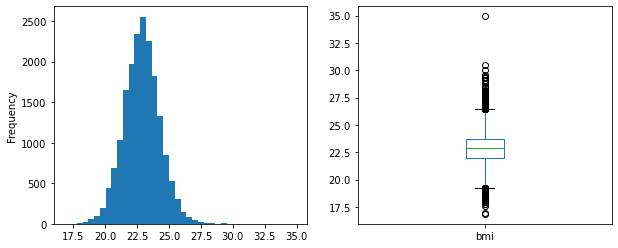

In [30]:
#### 1.4 Create a new column for bmi
fifa['bmi'] = 10000.0*fifa['WeightKg']/fifa['HeightCM']/fifa['HeightCM']
## plot and analyse the resulting distriburion of bmi
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fifa['bmi'].plot.hist(bins = 40, ax = ax[0])
fifa['bmi'].plot.box(ax = ax[1])
print("Measures of central location")
print("\tmean = ", fifa['bmi'].mean())
print("\tmedian = ", fifa['bmi'].median())

print("Measures of spread")
print("\trange = ", fifa['bmi'].max()-fifa['bmi'].min())
print("\tIQR = ", fifa['bmi'].quantile(0.75) - fifa['bmi'].quantile(0.25))
print("\tstdev = ", fifa['bmi'].std())

print("Measures of shape")
print("\tskewness = ", fifa['bmi'].skew())
print("\texcess kurtosis = ", fifa['bmi'].kurt())
print("bm seems to be fairly symmetrically distributed, perhaps a little less variable than a normal distribution (moderate kurtosis)")

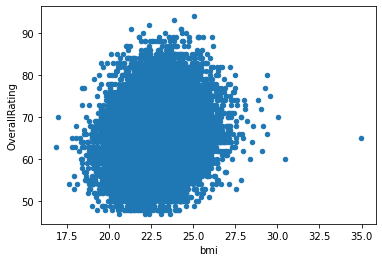

Pearson Correleation between bmi and rating 0.187673169292964
Spearman Correleation between bmi and rating 0.18709352225370204


In [32]:
## Does bmi impact on OverallRating?
fifa.plot.scatter(x = 'bmi', y= 'OverallRating')
plt.show()
print("Pearson Correleation between bmi and rating", fifa['OverallRating'].corr(fifa['bmi']))
print("Spearman Correleation between bmi and rating", fifa['OverallRating'].corr(fifa['bmi'], method = "spearman"))
print("very low correlation values either linear or for trend")
print("so little evidence to support hypothesis that bmi influences rating")

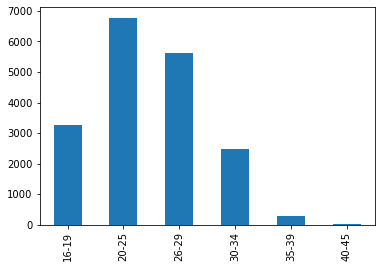

In [36]:
## 1.5. Create a new categorical column for AgeGroup
fifa['AgeGroup'] = pd.cut(fifa['Age'], bins = [16, 20, 25, 30, 35, 40, 45], 
                          labels = ['16-19', '20-25', '26-29', '30-34', '35-39', '40-45'])

fifa['AgeGroup'].value_counts().sort_index().plot.bar()

In [37]:
## 1.6 Detect missing values
fifa['Club'].isna().value_counts()

False    18236
True       256
Name: Club, dtype: int64

In [42]:
## remove the rows in the data frame where Club is missing
fifaWithClub = fifa[fifa['Club'].notna()]
## fifaWithClub = fifa.dropna() ## will not do quite what we require, it drops rows with any missing values
## nsted we wish to retain just those rows of fifa where specifically Club is missing, we can do that as follows
fifaWithClub['Club'].isna().value_counts()

False    18213
Name: Club, dtype: int64

### Task 2 - Working with a real-world messy dataset

In [76]:
import pandas as pd
df = pd.read_csv("C:/Data/AQ_UnionSt_2020.csv")
df.head()

,Date,Time,NO,Status/units,NO2,Status/units.1,NOXasNO2,Status/units.2,Dir,Status/units.3,Speed,Status/units.4,Temp,Status/units.5
0,01/01/2020,01:00:00,7.69388,V µg/m3,21.56423,V µg/m3,33.36134,V µg/m3,242.5,N °,4.9,N m/s,1.0,N °C
1,01/01/2020,02:00:00,6.73214,V µg/m3,20.83113,V µg/m3,31.15360,V µg/m3,220.9,N °,4.8,N m/s,0.8,N °C
2,01/01/2020,03:00:00,8.25489,V µg/m3,21.68524,V µg/m3,34.34256,V µg/m3,213.0,N °,4.8,N m/s,1.2,N °C
3,01/01/2020,04:00:00,8.21482,V µg/m3,23.40248,V µg/m3,35.99836,V µg/m3,191.8,N °,4.2,N m/s,1.6,N °C
4,01/01/2020,05:00:00,4.16752,V µg/m3,15.74858,V µg/m3,22.13868,V µg/m3,198.5,N °,4.8,N m/s,2.2,N °C


In [77]:
df.dtypes ## note that Data and Time are just text

Date               object
Time               object
NO                float64
Status/units       object
NO2               float64
Status/units.1     object
NOXasNO2          float64
Status/units.2     object
Dir               float64
Status/units.3     object
Speed             float64
Status/units.4     object
Temp              float64
Status/units.5     object
dtype: object

In [79]:
df.describe()

,NO,NO2,NOXasNO2,Dir,Speed,Temp
count,8640.000000,8640.000000,8640.000000,8675.000000,8675.000000,8675.000000
mean,21.772507,23.602388,56.986420,219.507147,5.442329,7.698651
std,31.818918,19.199303,65.741553,88.159050,2.945582,4.389081
min,0.173600,0.064540,0.865700,0.100000,0.000000,-3.100000
25%,3.418782,8.666313,14.629765,182.250000,3.200000,4.400000
50%,10.611525,18.254605,35.401180,227.600000,4.800000,7.500000
75%,26.269978,33.133583,73.322452,285.200000,7.300000,10.900000
max,519.854340,124.377130,921.476010,360.000000,19.000000,21.800000


In [80]:
## Are there any duplicates
print("Examine using describe function on the result of the .duplicated() function")
print(df.duplicated().describe())
print("Or Examine using value_counts() function on the result of the .duplicated() function")
print(df.duplicated().value_counts())
print("Either way we can infer there are 11 duplicates (8795-8784)")


Examine using describe function on the result of the .duplicated() function
count      8795
unique        2
top       False
freq       8784
dtype: object
Or Examine using value_counts() function on the result of the .duplicated() function
False    8784
True       11
dtype: int64
Either way we can infer there are 11 duplicates (8795-8784)


In [81]:
## remove the duplicated rows, we shall keep the last one perhaps 
## assuming that data is filled in order and the latest one on a given day is most relevant (?)
df = df.drop_duplicates(keep = 'last')

In [82]:
## Are there any duplicates
df.isna().describe()

,Date,Time,NO,Status/units,NO2,Status/units.1,NOXasNO2,Status/units.2,Dir,Status/units.3,Speed,Status/units.4,Temp,Status/units.5
count,8784,8784,8784,8784,8784,8784,8784,8784,8784,8784,8784,8784,8784,8784
unique,1,1,2,1,2,1,2,1,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,8784,8784,8629,8784,8629,8784,8629,8784,8664,8664,8664,8664,8664,8664


In [83]:
## Are there any duplicates
## df.isna().value_counts() ## this may work in latest version of Python

In [84]:
## Drop rows that have any missing values
df = df.dropna()

In [85]:
## Quick check that duplicates are gone, every column should be uniquely "False" for isna()
df.isna().describe()

,Date,Time,NO,Status/units,NO2,Status/units.1,NOXasNO2,Status/units.2,Dir,Status/units.3,Speed,Status/units.4,Temp,Status/units.5
count,8509,8509,8509,8509,8509,8509,8509,8509,8509,8509,8509,8509,8509,8509
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,8509,8509,8509,8509,8509,8509,8509,8509,8509,8509,8509,8509,8509,8509


In [86]:
## 2(f) Process the Data and Time into a single datatime type and create a new column in dataframe
dt = df['Date'].str.cat(df['Time'], sep = " ")
df['datetime'] = pd.to_datetime(dt, format = '%d/%m/%Y %H:%M:%S')
df.head()



,Date,Time,NO,Status/units,NO2,Status/units.1,NOXasNO2,Status/units.2,Dir,Status/units.3,Speed,Status/units.4,Temp,Status/units.5,datetime
0,01/01/2020,01:00:00,7.69388,V µg/m3,21.56423,V µg/m3,33.36134,V µg/m3,242.5,N °,4.9,N m/s,1.0,N °C,2020-01-01 01:00:00
1,01/01/2020,02:00:00,6.73214,V µg/m3,20.83113,V µg/m3,31.15360,V µg/m3,220.9,N °,4.8,N m/s,0.8,N °C,2020-01-01 02:00:00
2,01/01/2020,03:00:00,8.25489,V µg/m3,21.68524,V µg/m3,34.34256,V µg/m3,213.0,N °,4.8,N m/s,1.2,N °C,2020-01-01 03:00:00
3,01/01/2020,04:00:00,8.21482,V µg/m3,23.40248,V µg/m3,35.99836,V µg/m3,191.8,N °,4.2,N m/s,1.6,N °C,2020-01-01 04:00:00
4,01/01/2020,05:00:00,4.16752,V µg/m3,15.74858,V µg/m3,22.13868,V µg/m3,198.5,N °,4.8,N m/s,2.2,N °C,2020-01-01 05:00:00


In [87]:
df.dtypes ## datetime is now of correct 'datetime' type

Date                      object
Time                      object
NO                       float64
Status/units              object
NO2                      float64
Status/units.1            object
NOXasNO2                 float64
Status/units.2            object
Dir                      float64
Status/units.3            object
Speed                    float64
Status/units.4            object
Temp                     float64
Status/units.5            object
datetime          datetime64[ns]
dtype: object

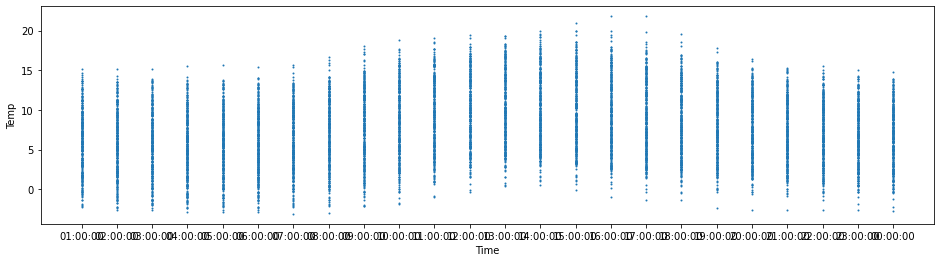

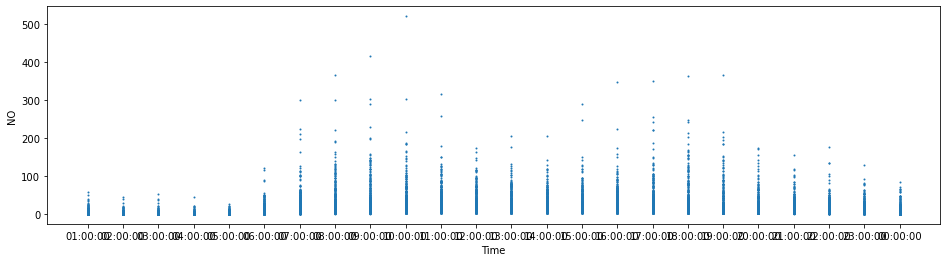

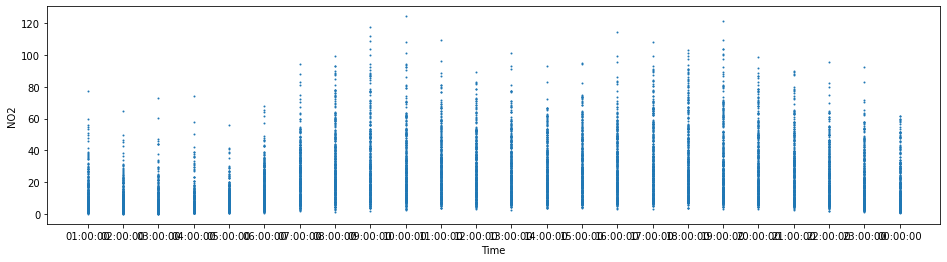

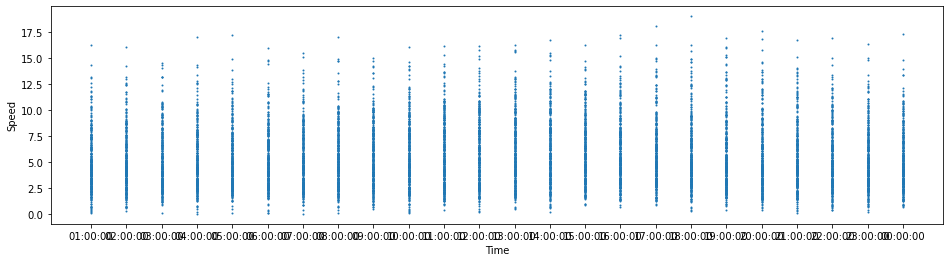

In [103]:
## Explore some of the data against time of day
df.plot.scatter(x = "Time", y="Temp", figsize = (16,4), s = 1)
plt.show()

df.plot.scatter(x = "Time", y="NO", figsize = (16,4), s = 1)
plt.show()

df.plot.scatter(x = "Time", y="NO2", figsize = (16,4), s = 1)
plt.show()

df.plot.scatter(x = "Time", y="Speed", figsize = (16,4), s = 1)
plt.show()

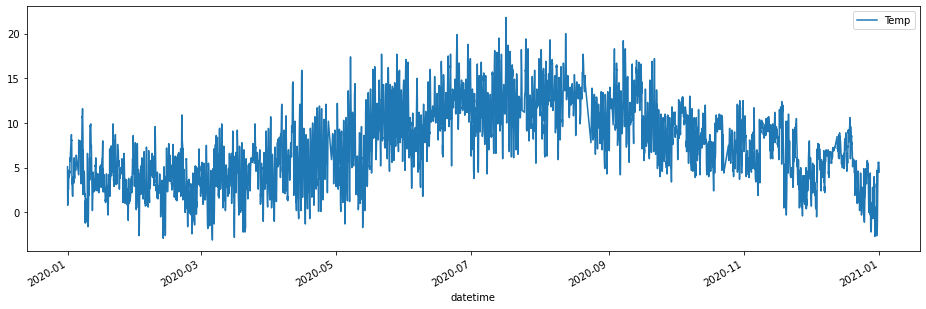

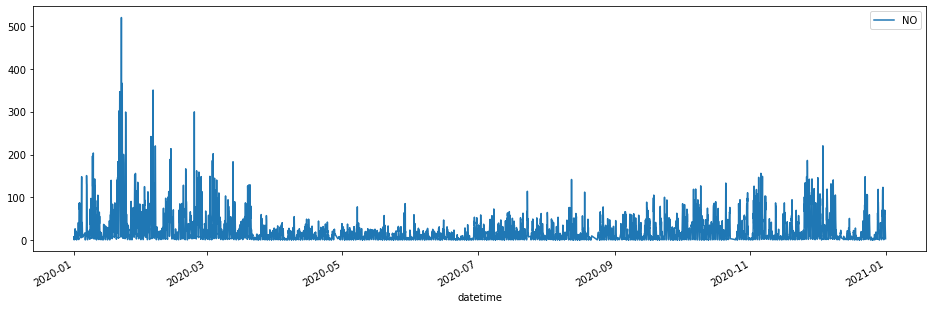

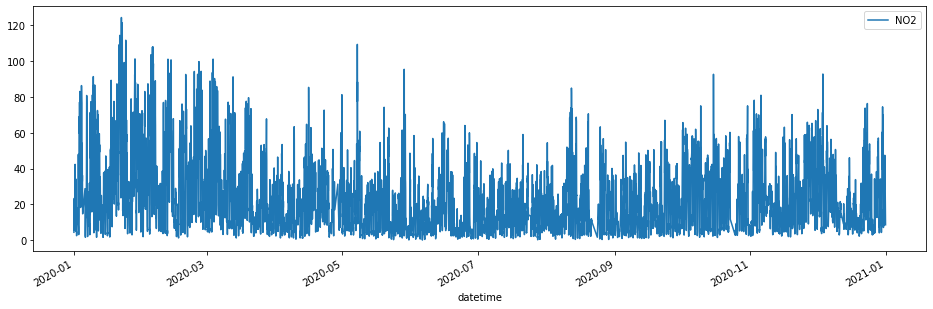

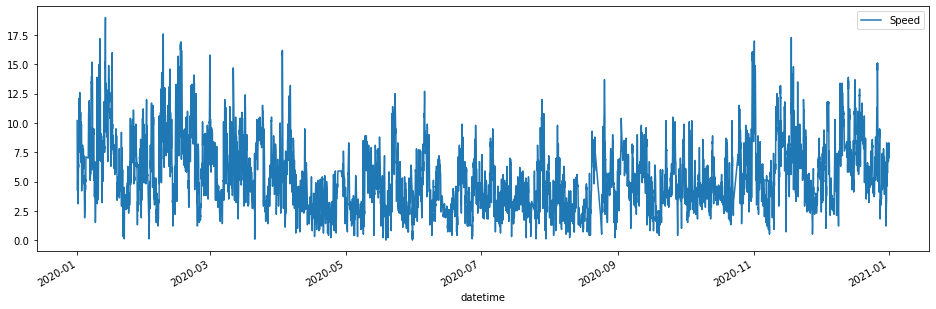

In [97]:
## Explore some of the data against time
df.plot.line(x = "datetime", y="Temp", figsize = (16,5))
plt.show()

df.plot.line(x = "datetime", y="NO", figsize = (16,5))
plt.show()

df.plot.line(x = "datetime", y="NO2", figsize = (16,5))
plt.show()

df.plot.line(x = "datetime", y="Speed", figsize = (16,5))
plt.show()


In [96]:
## Are there correlations between the variables
df.corr()


,NO,NO2,NOXasNO2,Dir,Speed,Temp
NO,1.000000,0.838911,0.987307,0.110488,-0.122577,-0.182485
NO2,0.838911,1.000000,0.914706,0.030194,-0.163921,-0.223416
NOXasNO2,0.987307,0.914706,1.000000,0.090848,-0.138848,-0.200690
Dir,0.110488,0.030194,0.090848,1.000000,0.036403,-0.234548
Speed,-0.122577,-0.163921,-0.138848,0.036403,1.000000,-0.097633
Temp,-0.182485,-0.223416,-0.200690,-0.234548,-0.097633,1.000000
